In [376]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from lmfit.models import SineModel

In [377]:
import os
os.getcwd()

'c:\\Users\\alexr\\uni\\qo_labs\\single photon evals'

In [378]:
controldata = pd.read_csv('../singlephotoncsv/control.csv')
signaldata = pd.read_csv('../singlephotoncsv/signall.csv')
qwpdata = pd.read_csv('../singlephotoncsv/qwp.csv')

In [379]:
controldata = controldata.rename(columns={'angle ':'angle'})
controldata = controldata.sort_values(by = 'angle')
controldata['yerrs'] = np.array([controldata['count']*0.02, np.sqrt(controldata['count']) ]).T.max(axis=1)

In [380]:
controldata['radians'] = np.deg2rad(controldata['angle'])

In [381]:
x = controldata['radians']
y = controldata['count']

In [382]:
def cos_squared(x, A, B, C, D):
    return A * np.cos(B * x + C) + D

In [383]:
# Initial guesses for A, B, C, D
initial_guess = [controldata['count'].max(), 1, np.pi/2, controldata['count'].min()]

params, params_covariance = curve_fit(cos_squared, x, y, p0=initial_guess)
params_uncertainties = np.sqrt(np.diag(params_covariance))

In [384]:
# Print the fitted parameters
print("Fitted parameters:", params)

print('Covar', params_covariance)

Fitted parameters: [-4.37407295e+04  1.96770391e+00 -9.68657909e-01  5.25766682e+04]
Covar [[ 9.17111211e+04  8.47275846e-01 -1.79223314e+00  3.94082153e+04]
 [ 8.47275846e-01  1.83927207e-04 -3.85112915e-04  2.12740334e+00]
 [-1.79223314e+00 -3.85112915e-04  8.90382538e-04 -4.44705006e+00]
 [ 3.94082153e+04  2.12740334e+00 -4.44705006e+00  8.49198453e+04]]


In [385]:
xlin_rad = np.linspace(0,4, 50000)
xlin = np.rad2deg(xlin_rad)

In [386]:
# anfle of the maximum
ys = cos_squared(xlin_rad, *params)
center = xlin[ys.argmax()]

In [387]:
print(center)

119.68181788328403


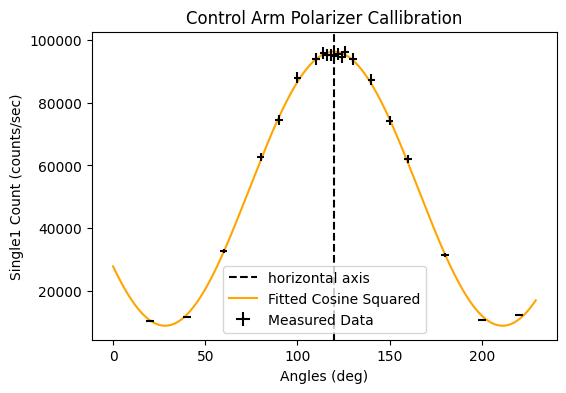

In [388]:
# Plot the data and the fitted curve
plt.figure(figsize=(6, 4))
# plt.scatter(controldata['angle'], y, label='Measured Data', color = 'black', s=20)
plt.axvline(center, label = 'horizontal axis', linestyle ='dashed', color ='black')
plt.plot(xlin, cos_squared(xlin_rad, *params), label='Fitted Cosine Squared', color='orange')
# plt.scatter(x,y)
plt.errorbar(controldata['angle'], y, yerr=controldata['yerrs'], xerr = ([2]*len(controldata)), fmt ='none', color ='black', label ='Measured Data')
plt.legend()
plt.xlabel('Angles (deg)')
plt.ylabel('Single1 Count (counts/sec)')
plt.title('Control Arm Polarizer Callibration')
# plt.xlim(150,210)
plt.show()

In [389]:
print(np.rad2deg(params),'\n', np.rad2deg(params_uncertainties))

[-2.50615919e+06  1.12741129e+02 -5.55000100e+01  3.01242119e+06] 
 [1.73513645e+04 7.77044015e-01 1.70966472e+00 1.66965687e+04]


In [390]:
print('Maxi angle and unc.')
print(center,  np.rad2deg(params_uncertainties)[2])

Maxi angle and unc.
119.68181788328403 1.7096647184233325


##SIGNAL

In [391]:
signaldata.head()

,angles,counts,coincidences,Unnamed: 3
0,26,115800,3343,NaN
1,20,114400,3204,NaN
2,10,106800,3046,NaN
3,0,94700,2523,NaN
4,30,116100,3361,NaN


In [392]:
signaldata['radians'] = np.deg2rad(signaldata['angles'])
signaldata['yerrs_counts']  =  np.array([signaldata['counts']*0.02, np.sqrt(signaldata['counts']) ]).T.max(axis=1)
signaldata['yerrs_conc']  =  np.array([signaldata['coincidences']*0.02, np.sqrt(signaldata['coincidences']) ]).T.max(axis=1)


In [393]:
x = signaldata['radians']
countsS0 = signaldata['counts']
countsC = signaldata['coincidences']

In [394]:
# Initial guesses for A, B, C, D
initial_guess = [signaldata['counts'].max(), 1, np.pi/2, signaldata['counts'].min()]
p0C = [signaldata['coincidences'].max(), 1, np.pi/2, signaldata['coincidences'].min()]

params, params_covariance = curve_fit(cos_squared, x, countsS0, p0=initial_guess)
params_uncertainties = np.sqrt(np.diag(params_covariance))

paramsC, paramscovC = curve_fit(cos_squared, x, countsC, p0=p0C)
params_uncC= np.sqrt(np.diag(paramscovC))

In [395]:
# Print the fitted parameters
print("Fitted parameters:", params)
print('Covar', params_covariance)

Fitted parameters: [ 5.45636909e+04 -1.98833201e+00  9.74786682e-01  6.18247808e+04]
Covar [[ 1.50366205e+05  6.51956820e-01 -8.26533195e-01 -6.20072051e+04]
 [ 6.51956820e-01  1.43175858e-04 -9.68985205e-05 -1.64980110e+00]
 [-8.26533195e-01 -9.68985205e-05  1.63199530e-04  1.40581650e+00]
 [-6.20072051e+04 -1.64980110e+00  1.40581650e+00  1.23148206e+05]]


In [396]:
xlin_rad = np.linspace(-2,3, 50000)
xlin = np.rad2deg(xlin_rad)


In [397]:
# anfle of the maximum
ys1 = cos_squared(xlin_rad, *params)
centerS = xlin[ys1.argmax()]
print(centerS)

ys2= cos_squared(xlin_rad, *paramsC)
centerC = xlin[ys2.argmax()]
print(centerC)

28.089244733388146
29.14350816169741


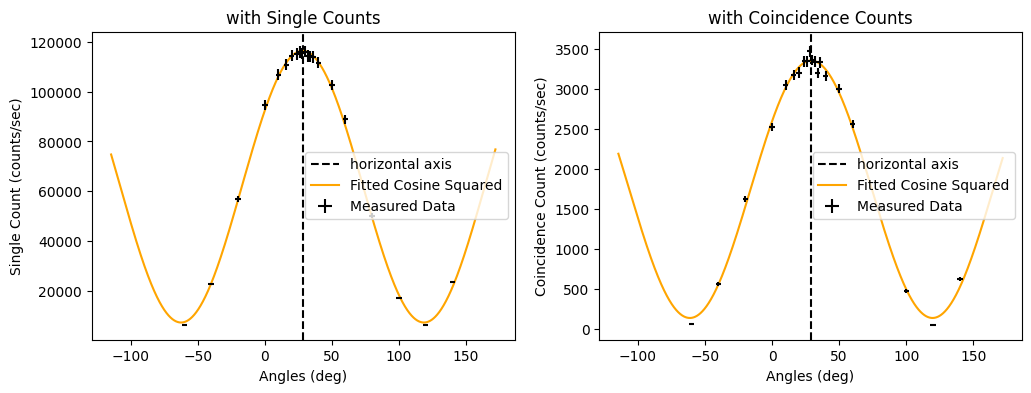

In [409]:
# Plot the data and the fitted curve
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
# fig.suptitle('Signal Arm Polarizer Callibration')


ax1.axvline(centerS, label = 'horizontal axis', linestyle ='dashed', color ='black')
ax1.plot(xlin, cos_squared(xlin_rad, *params), label='Fitted Cosine Squared', color='orange')
ax1.errorbar(signaldata['angles'], countsS0, yerr=signaldata['yerrs_counts'], xerr = ([2]*len(signaldata)), fmt ='none', color ='black', label ='Measured Data')
ax1.legend(loc='center right')
ax1.set_xlabel('Angles (deg)')
ax1.set_ylabel('Single Count (counts/sec)')
ax1.set_title('with Single Counts')

ax2.axvline(centerC, label = 'horizontal axis', linestyle ='dashed', color ='black')
ax2.plot(xlin, cos_squared(xlin_rad, *paramsC), label='Fitted Cosine Squared', color='orange')
ax2.errorbar(signaldata['angles'], countsC, yerr=signaldata['yerrs_conc'], xerr = ([2]*len(signaldata)), fmt ='none', color ='black', label ='Measured Data')
ax2.legend(loc='center right')
ax2.set_xlabel('Angles (deg)')
ax2.set_ylabel('Coincidence Count (counts/sec)')
ax2.set_title('with Coincidence Counts')

plt.show()

In [420]:
qwpdata = qwpdata.rename(columns={'angle xi':'angles'}) 
qwpdata = qwpdata.sort_values(by ='angles')

In [422]:
qwpdata['yerrs'] = np.array([qwpdata['coincidences']*0.02, np.sqrt(qwpdata['coincidences'])]).T.max(axis=1)
qwpdata['radians'] = np.deg2rad(qwpdata['angles'])

In [423]:
x_qwp = qwpdata['radians']
y_qwp = qwpdata['coincidences']

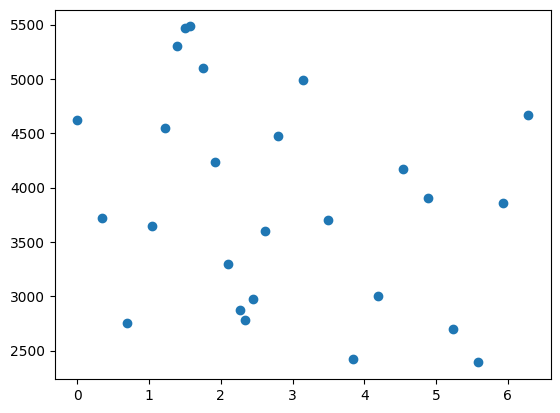

In [424]:
plt.scatter(x_qwp, y_qwp)

In [431]:
1000/6

166.66666666666666

In [425]:
initial_guess = [y_qwp.max()-y_qwp.min(), 2, 0.8, 0]

params, params_covariance = curve_fit(cos_squared, x_qwp, y_qwp, p0=initial_guess)
params_unc = np.sqrt(np.diag(params_covariance))

In [426]:
xlin_rad = np.linspace(0,6, 50000)
xlin = np.rad2deg(xlin_rad)

In [428]:
# anfle of the maximum
ys = cos_squared(xlin_rad, *params)
center = xlin[ys.argmax()]
print(center)

229.15103177407642


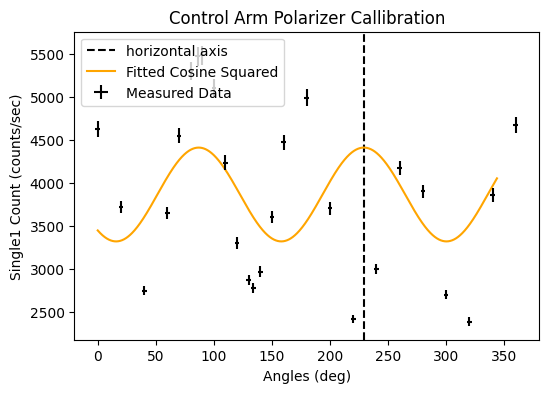

In [430]:
# Plot the data and the fitted curve
plt.figure(figsize=(6, 4))
# plt.scatter(controldata['angle'], y, label='Measured Data', color = 'black', s=20)
plt.axvline(center, label = 'horizontal axis', linestyle ='dashed', color ='black')
plt.plot(xlin, cos_squared(xlin_rad, *params), label='Fitted Cosine Squared', color='orange')
# plt.scatter(x,y)
plt.errorbar(qwpdata['angles'], y_qwp, yerr=qwpdata['yerrs'], xerr = ([2]*len(qwpdata)), fmt ='none', color ='black', label ='Measured Data')
plt.legend()
plt.xlabel('Angles (deg)')
plt.ylabel('Single1 Count (counts/sec)')
plt.title('Control Arm Polarizer Callibration')
# plt.xlim(150,210)
plt.show()